<img src="matplotlib-logo.png" alt="Matplotlib">
## Python Plotting with Matplotlib

Austin Godber
@godber

DesertPy - 8/26/2015

# Improving reproducibility of presentations

* Virtualenv Creation

```
mkvirtualenv desertpy-matplotlib-godber
```

* Virtualenv Prep

```
pip install -U setuptools
pip install -U wheel
pip install -U pip
```

* Dependency Setup

```
cd ~/Workspace/desertpy-presentations/matplotlib-godber
pip install -r requirements.txt
```

# Two Faces of Matplotlib

* `pyplot`
* OOP Interface

# `pyplot` - like MATLAB plotting

"collection of command style functions that ... makes some change to a figure ... is stateful in that it keeps track of the current figure and plotting area, and the plotting functions are directed to the current axes"

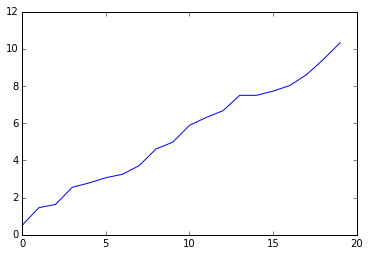

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.random.rand(20).cumsum())
plt.show()

Note that `plot` is a function from the `pyplot` module.  We are NOT calling a `plot` method on a `plt` object.

All of the "messy" "plot-y" bits are magically and implicitly created behind the scenes.

This fact may drive you batty when you try and do anything complex.

It sure does for me.

Furthermore, it violates the Zen of Python.

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### Explicit is better than implicit.

### There should be one-- and preferably only one --obvious way to do it.

# OOP interface

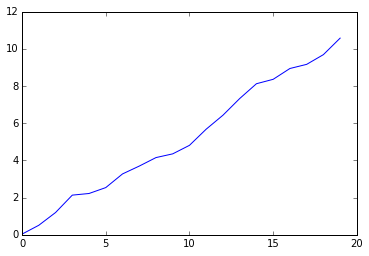

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.random.rand(20).cumsum())

#### Note that this is a bit of a lie

I still use the `pyplot.figure()` so I am still using the `pyplot` interface, but at least I now keep references to all of the bits.

Let's forge ahead, but before we do so ... remember ...

# Two Faces of Matplotlib

* `pyplot` - implicit, creepy objects lurking in the dark
* OOP Interface - sensible, well behaved interface

Every time you call `plt.*` you're one step closer to transforming into Mr Hyde.
<img src="Dr_Jekyll_and_Mr_Hyde_poster_edit2.jpg" width="80%">

# Figures and Axes

* `Figures` are where you put `Axes` objects
* `Axes` has the plotting methods and plot elements

* `plt.subplots()` is the quickest way to start a figure with one or more axis objects while keeping references to them.

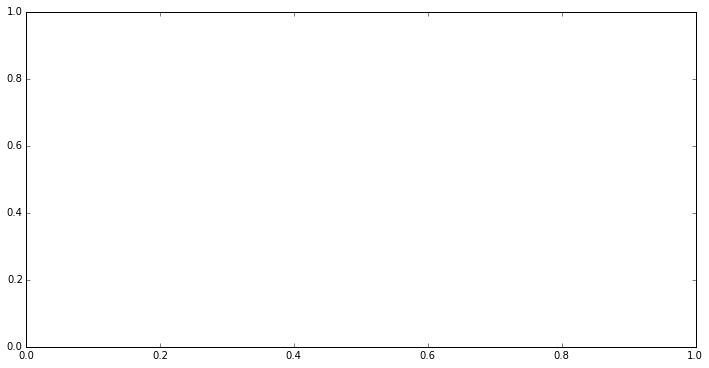

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))  # omit arguments for default

* A **figure** may contain one or more **axis**

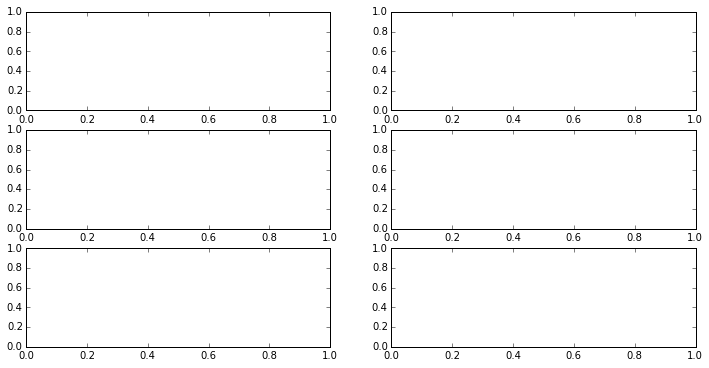

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 2, figsize=(12,6))

Whats this *axes* thing now?

In [6]:
print axes.shape
print axes

(3, 2)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86fff74990>


Plot on one of these axes ...

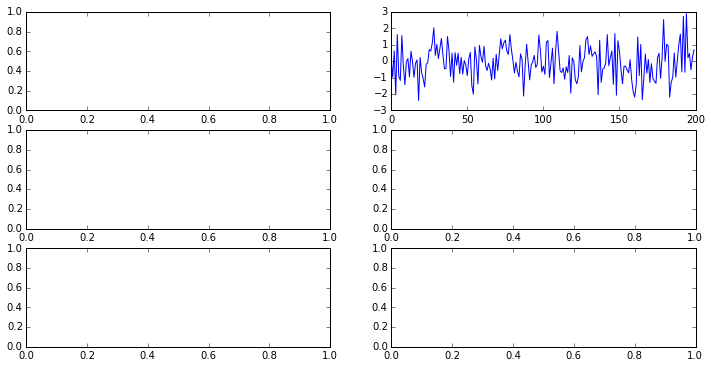

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 2, figsize=(12,6))
_ = axes[0,1].plot(np.random.randn(200))

Perhaps you want to give your axes meaningful names ...

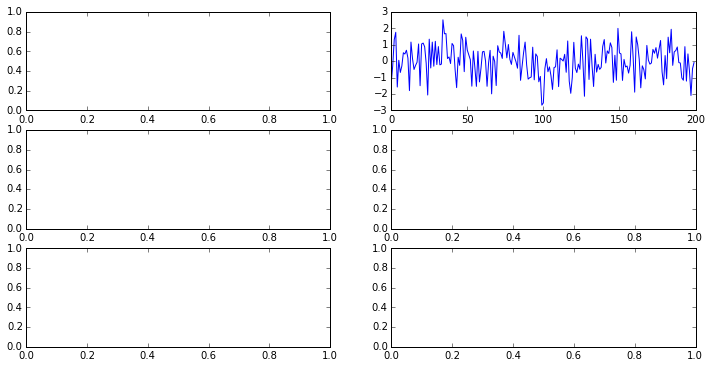

In [8]:
import matplotlib.pyplot as plt
import numpy as np

fig, ((ax_lt, ax_rt), (ax_lm, ax_rm), (ax_lb, ax_rb)) = plt.subplots(3, 2, figsize=(12,6))
_ = ax_rt.plot(np.random.randn(200))

Plotting on all four axes with meaningful names ...

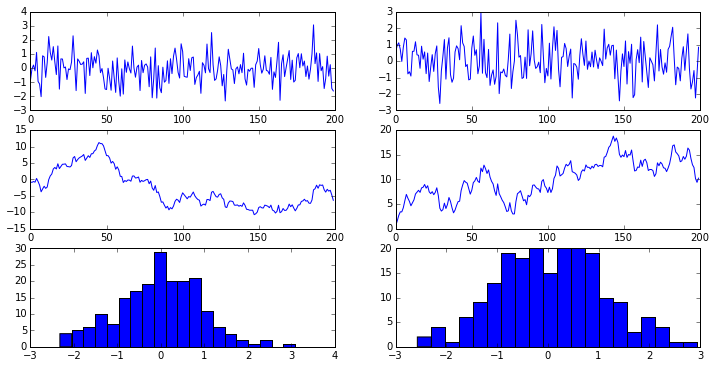

In [9]:
import matplotlib.pyplot as plt
import numpy as np

thing1 = np.random.randn(200)
thing2 = np.random.randn(200)

fig, (
    (ax_thing1, ax_thing2),
    (ax_thing1_sum, ax_thing2_sum),
    (ax_thing1_hist, ax_thing2_hist)
) = plt.subplots(3, 2, figsize=(12,6))
ax_thing1.plot(thing1)
ax_thing2.plot(thing2)
ax_thing1_sum.plot(thing1.cumsum())
ax_thing2_sum.plot(thing2.cumsum())
ax_thing1_hist.hist(thing1, bins=20)
_ = ax_thing2_hist.hist(thing2, bins=20)

# What can be plotted?

As we have seen ... 

Lines using `ax.plot()` ...

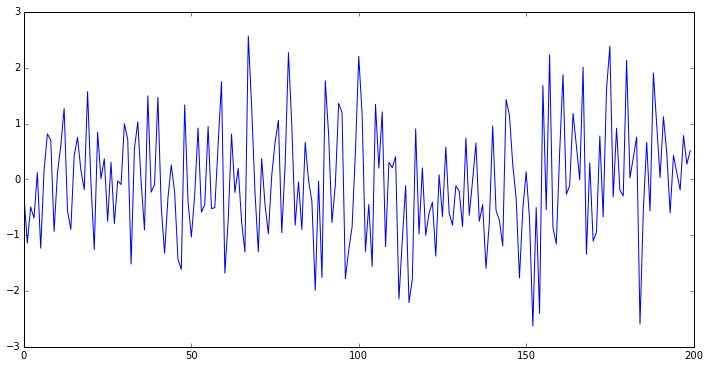

In [10]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.random.randn(200))

and histograms using `ax.hist(data, bins=N)` ...

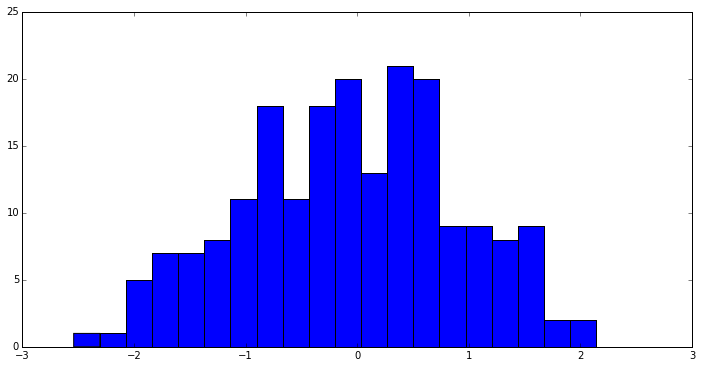

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
_ = ax.hist(np.random.randn(200), bins=20)

Points using `ax.scatter(x, y)` ...

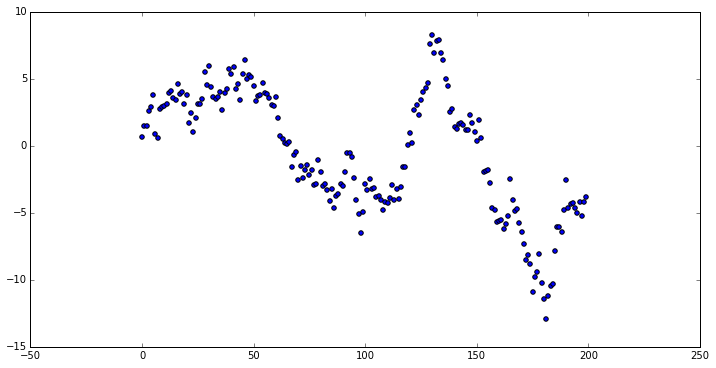

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.scatter(np.arange(200), np.random.randn(200).cumsum())

or Points using `ax.plot(x, y)` and changing the line type to `o` ...

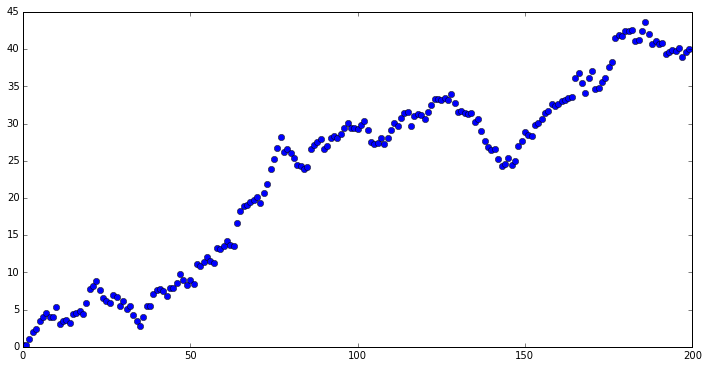

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.arange(200), np.random.randn(200).cumsum(), 'o')

### but don't open the **style** can of worms yet!

bars with `ax.bars(x, height)` ...

<Container object of 10 artists>

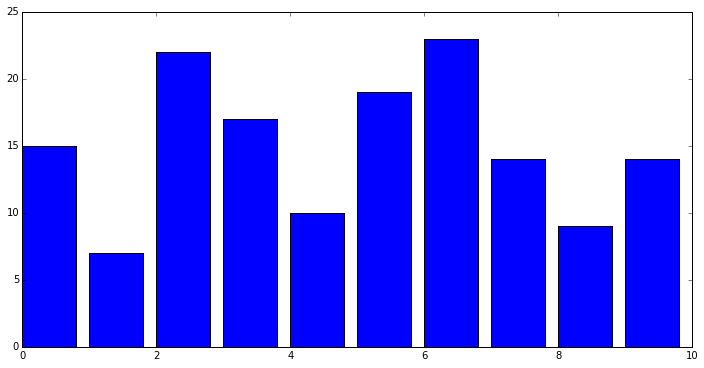

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.bar(np.arange(10), [15, 7, 22, 17, 10, 19, 23, 14, 9, 14])

stackplots with `ax.stackplot(x, y1, y2)` ...

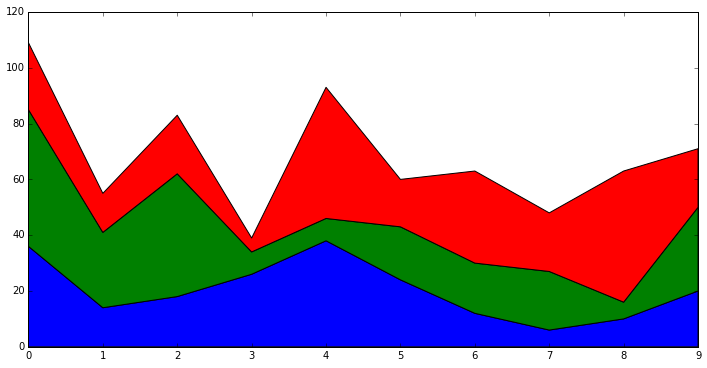

In [15]:
import numpy as np
import matplotlib.pyplot as plt

fnx = lambda : np.random.randint(5, 50, 10)
x = np.arange(10)

y1, y2, y3 = fnx(), fnx(), fnx()

fig, ax = plt.subplots(figsize=(12,6))
_ = ax.stackplot(x, y1, y2, y3)

line plot on polar axis with the `polar=True` keyword on `subplot()` ...

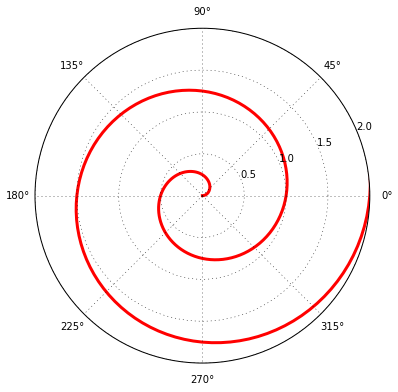

In [16]:
import numpy as np
import matplotlib.pyplot as plt

r = np.arange(0, 3.0, 0.01)
theta = 2 * np.pi * r

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, polar=True)
ax.plot(theta, r, color='r', linewidth=3)
ax.set_rmax(2.0)
ax.grid(True)

NOTE: I had to go back to the longer form of creating the figure first then adding a subplot with `add_subplot` because `plt.subplots()` didn't take `polar=True` as an argument.

contour plots with `ax.contour()`

<matplotlib.contour.QuadContourSet instance at 0x7f86fefd0170>

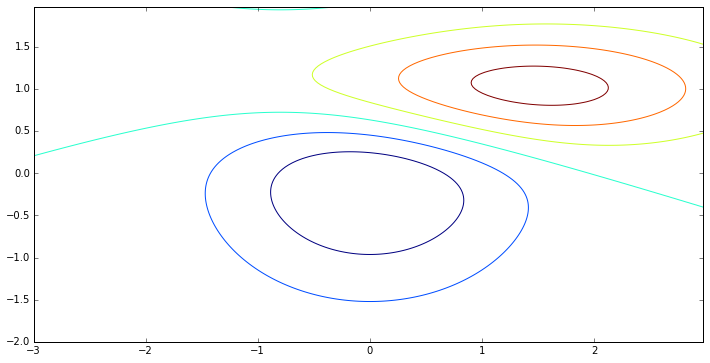

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

x = np.arange(-3.0, 3.0, 0.025)
y = np.arange(-2.0, 2.0, 0.025)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10.0 * (Z2 - Z1)

fig, ax = plt.subplots(figsize=(12,6))
ax.contour(X, Y, Z)

And now ... No. 1 ... the larch

<img src="larch.jpg">

# Matplotlib Gallery

I could go on for hours with plot types

http://matplotlib.org/gallery.html

<img src="matplotlib_gallery.png">

# How to use the docs

The gallery is a great resource, but some of the examples are using the `pyplot` interface, in those cases see if `axes` has an equivalent method:

http://matplotlib.org/api/axes_api.html

# Gettin' Fancy

Two lines on a plot .. call `ax.plot()` twice with different inputs!

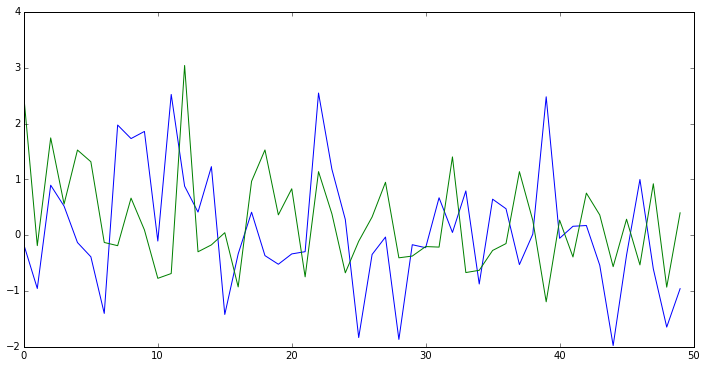

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.random.randn(50))
ax.plot(np.random.randn(50))

Add a label by using the `label=` keyword when you call plot, then show the label by calling `ax.label()`.

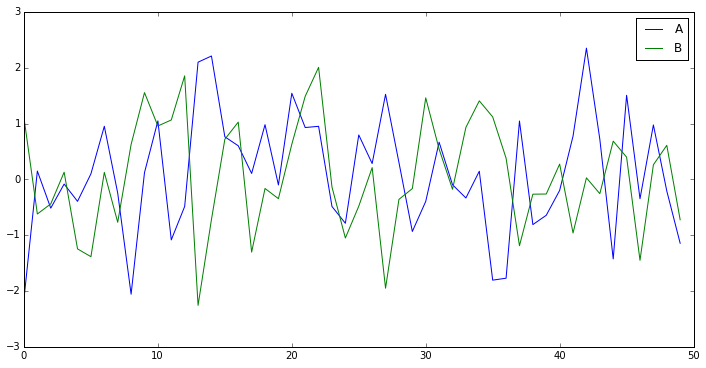

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.random.randn(50), label='A')
ax.plot(np.random.randn(50), label='B')
ax.legend()

Dots on your plot ... specify a style string as an argument to plot ... `plot(x, 'ko')`.  Change color and move the label too!

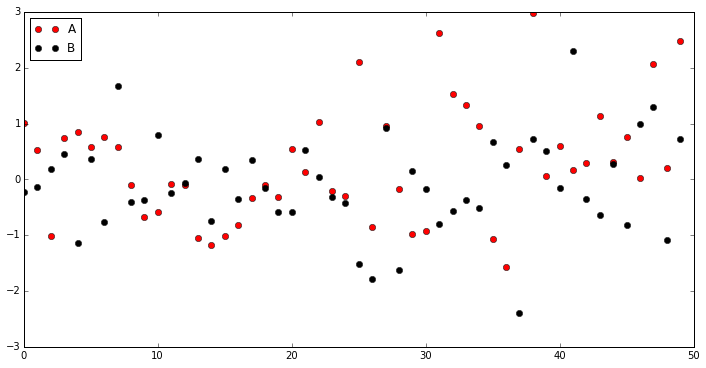

In [20]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.random.randn(50), 'ro', label='A')
ax.plot(np.random.randn(50), 'ko', label='B')
ax.legend(loc=2)

Keywords work too! `linestyle='None', marker='o', color='r'` equals `'ro'`

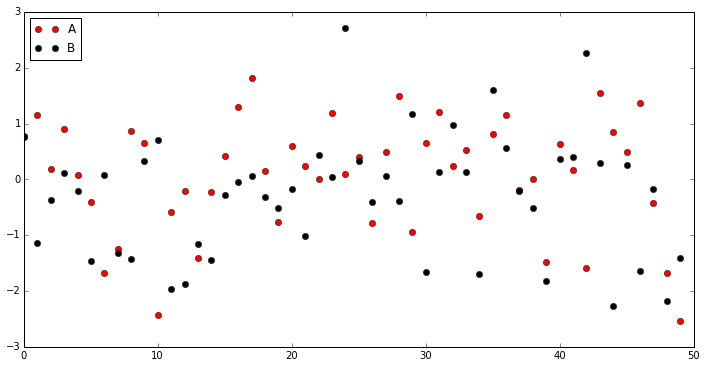

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='r', label='A')
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='k', label='B')
ax.legend(loc=2)

Custom tickmarks with `ax.set_xticks()` ...

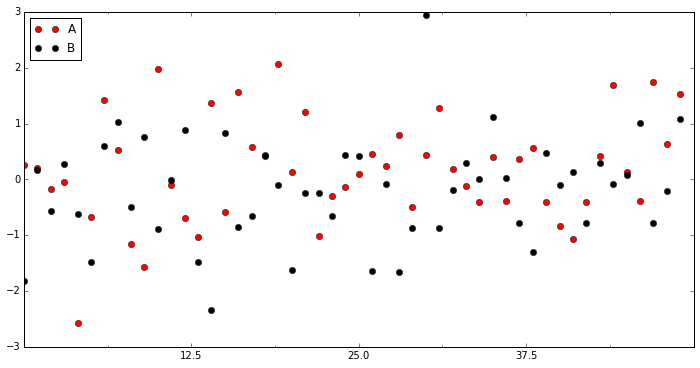

In [22]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.random.randn(50), 'ro', label='A')
ax.plot(np.random.randn(50), 'ko', label='B')
ax.legend(loc=2)
_ = ax.set_xticks([12.5, 25, 37.5])
_ = ax.set_xticks([6.25, 18.75, 31.25, 43.75], minor=True)

Good lord,  I forgot figure and axes titles!

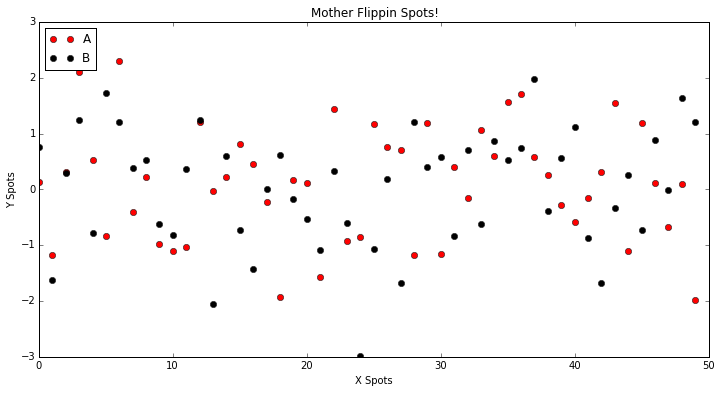

In [23]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='r', label='A')
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='k', label='B')
ax.legend(loc=2)
ax.set_title('Mother Flippin Spots!')
ax.set_xlabel('X Spots')
ax.set_ylabel('Y Spots')

Turn it up to 11! (aka: adjusting the font size)

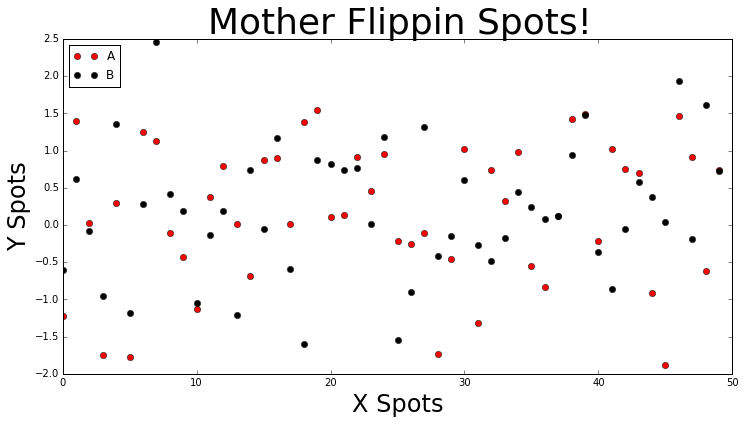

In [24]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='r', label='A')
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='k', label='B')
ax.legend(loc=2)
ax.set_title('Mother Flippin Spots!', fontsize=36)
ax.set_xlabel('X Spots', fontsize=24)
ax.set_ylabel('Y Spots', fontsize=24)

Setting the x and y ranges with `ax.set_xlim()` and `ax.set_ylim()`.

(-1, 1)

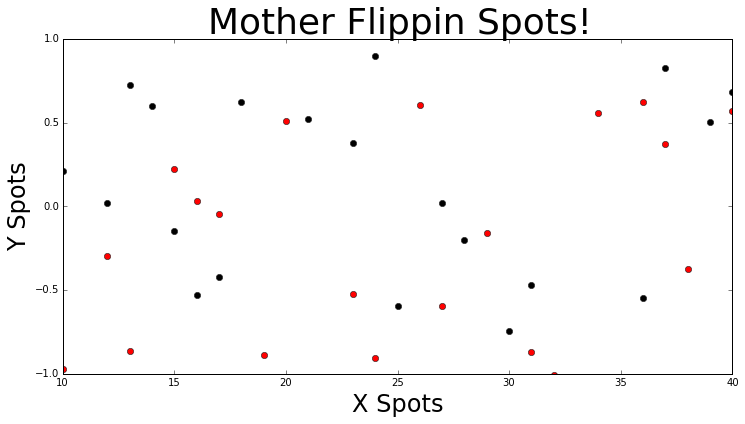

In [25]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='r', label='A')
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='k', label='B')
ax.set_title('Mother Flippin Spots!', fontsize=36)
ax.set_xlabel('X Spots', fontsize=24)
ax.set_ylabel('Y Spots', fontsize=24)
ax.set_xlim(10, 40)
ax.set_ylim(-1, 1)

LaTeX can be included in any string by wrapping it in `$...$`.

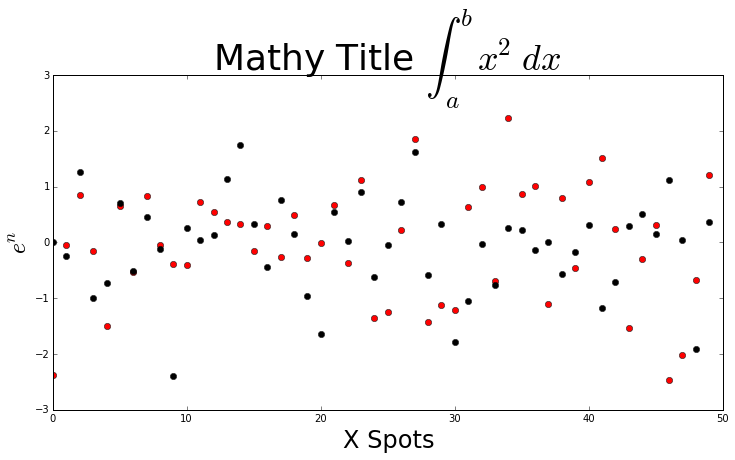

In [26]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='r', label='A')
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='k', label='B')
ax.set_title('Mathy Title $\int_{a}^{b} x^2 dx$', fontsize=36)
ax.set_xlabel('X Spots', fontsize=24)
ax.set_ylabel('$e^n$', fontsize=24)

Add text annotation with `ax.text(x, y, 'text')`

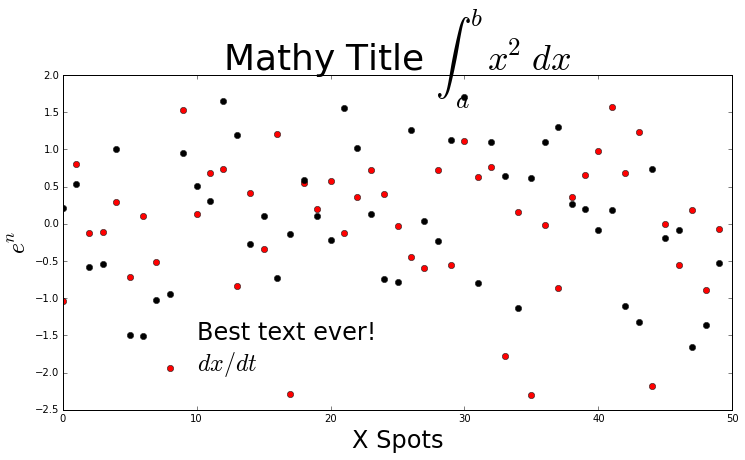

In [27]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='r', label='A')
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='k', label='B')
ax.set_title('Mathy Title $\int_{a}^{b} x^2 dx$', fontsize=36)
ax.set_xlabel('X Spots', fontsize=24)
ax.set_ylabel('$e^n$', fontsize=24)
ax.text(10, -2, "Best text ever!\n$dx/dt$", fontsize=24)

Everything done above can be found on this single page http://matplotlib.org/api/axes_api.html.  No googling, no digging through stack overflow.  Once you have an `ax` object (or list of them) you can just rely on this page to modify those objects.

# Saving a Figure

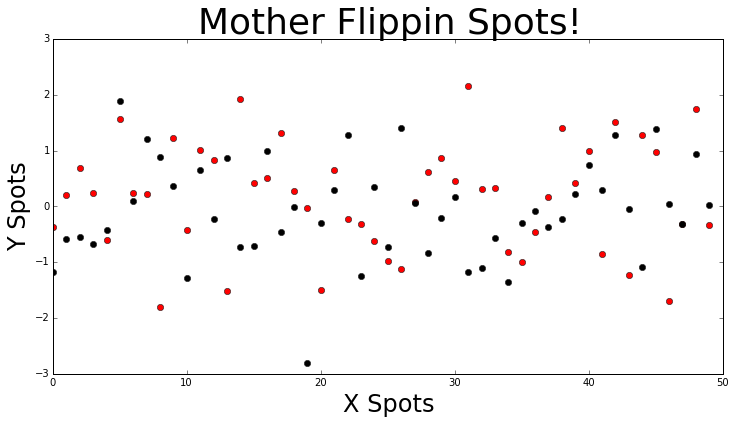

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, figsize=(12,6))
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='r', label='A')
ax.plot(np.random.randn(50), linestyle='None', marker='o', color='k', label='B')
ax.set_title('Mother Flippin Spots!', fontsize=36)
ax.set_xlabel('X Spots', fontsize=24)
ax.set_ylabel('Y Spots', fontsize=24)
fig.savefig('myfig.png', dpi=200)

# Extra Material

## Configuration

You can override default values with a personal config file or dynamically within your program (notebook).  Configurable params can be found here: http://matplotlib.org/users/customizing.html

For example, to change the default line styling:

```python
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
```
equilvalently
```python
import matplotlib as mpl
mpl.rc('lines', linewidth=2, color='r')
```

Or maybe you want a larger default figure size in your matplotlib notebook ... set `rcParams['figure.figsize']`

## Animations

* Make them frame-by-frame and generate a movie from those frames with ffmpeg
* Use matplotlib animate helper routines: http://matplotlib.org/examples/animation/index.html
* Makes a great talk in the future :)
* Need inspiration?  Check out this entry from the 2015 John Hunter Excellence in Plotting contest
  * http://stsdas.stsci.edu/download/mdroe/plotting-2015/entry12/index.html

## GUI Applications

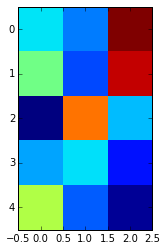

In [29]:
# %load cursor_value.py
"""
Show how to modify the coordinate formatter to report the image "z"
value of the nearest pixel given x and y
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

X = 10*np.random.rand(5,3)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(X, cmap=cm.jet, interpolation='nearest')

numrows, numcols = X.shape
def format_coord(x, y):
    col = int(x+0.5)
    row = int(y+0.5)
    if col>=0 and col<numcols and row>=0 and row<numrows:
        z = X[row,col]
        return 'x=%1.4f, y=%1.4f, z=%1.4f'%(x, y, z)
    else:
        return 'x=%1.4f, y=%1.4f'%(x, y)

ax.format_coord = format_coord
plt.show()


<img src="cursor_value.png">